In [30]:
!pip install tensorflow_addons

# **Data** **Exploration**
In this step we will load our dataset and explore the data. There are two datasets in the given link. One is MIT and the second one is PTB. We are going to work with MIT

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import normalize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, InputLayer, LSTM, GRU, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow_addons as tfa

In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


<h1>Data Exploration</h1>
In this, we are going to load the data. After that we are going to explore it with different visualizations, check for null values, size and shape of data samples and any correlation between the attributes.

In [3]:
#loading the files
testData = pd.read_csv('./Downloads/heart/mitbih_test.csv',header=None)
trainData = pd.read_csv('./Downloads/heart/mitbih_train.csv', header=None)
abnormalData = pd.read_csv('./Downloads/heart/ptbdb_abnormal.csv', header=None)
normalData = pd.read_csv('./Downloads/heart/ptbdb_normal.csv', header=None)

In [4]:
dfTest = pd.DataFrame(testData)
dfTrain = pd.DataFrame(trainData)
dfAbnormal = pd.DataFrame(abnormalData)
dfNormal = pd.DataFrame(normalData)

In [5]:
dfTest.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dfTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfAbnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
dfNormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dfTest.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,...,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,...,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432777,0.167630,0.147642,0.158111,0.144068,0.144509,0.150422,0.149029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912319,0.583991,0.347092,0.259211,0.287356,0.298453,0.294563,0.289907,0.282956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [10]:
dfTrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
#Check for null values in the test dataset
dfTest.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Check for null values in the train dataset
dfTrain.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
dfTest.shape, dfTrain.shape

((21892, 188), (87554, 188))

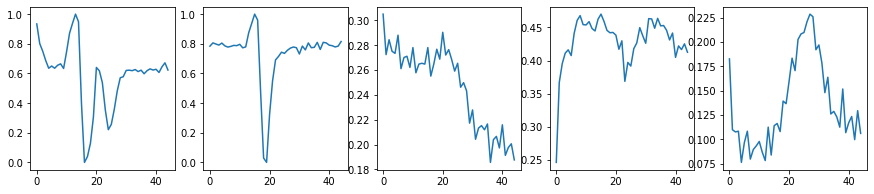

In [14]:
# Plotting of normal and abnormal heartbeat
plt.figure(figsize=(15, 3))
plt.title('Abnormal Heart beat ECG visualization')
plt.subplot(1, 5, 1)
plt.plot(dfAbnormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(dfAbnormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(dfAbnormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(dfAbnormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(dfAbnormal.values[44][5:50])

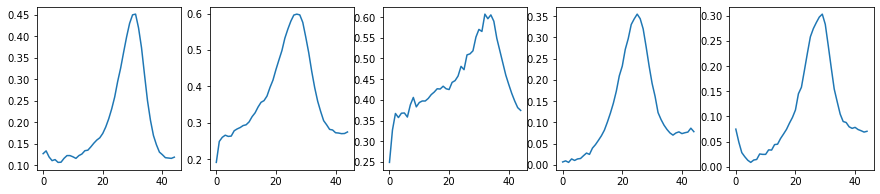

In [15]:
plt.figure(figsize=(15, 3))
plt.title('Normal heart beat ECG Visualization')
plt.subplot(1, 5, 1)
plt.plot(dfNormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(dfNormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(dfNormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(dfNormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(dfNormal.values[77][5:50])

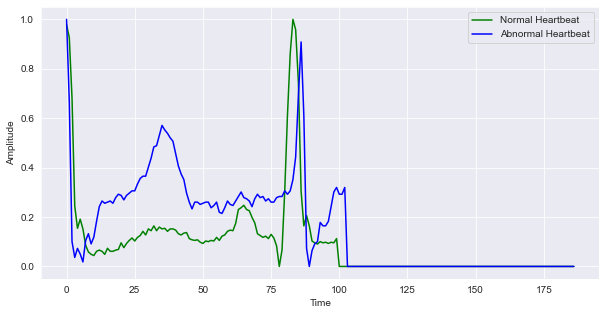

In [16]:
# making the class labels for our dataset
data_1 = dfTrain[dfTrain[187] == 1]
data_2 = dfTrain[dfTrain[187] == 2]
data_3 = dfTrain[dfTrain[187] == 3]
data_4 = dfTrain[dfTrain[187] == 4]

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(dfTrain.iloc[0, 0:187], color='green', label='Normal Heartbeat')
plt.plot(data_1.iloc[0, 0:187], color='blue', label='Abnormal Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [17]:
#Checking the distribution of classes
dfTrain[187]=dfTrain[187].astype(int)
targetCol = dfTrain[187]
labels = ['Normal beat','Supraventricular premature beat','Premature ventricular contraction','Fusion of ventricular and normal beat','Unclassifiable beat']
pd.Series(np.bincount(targetCol),index=labels)

Normal beat                              72471
Supraventricular premature beat           2223
Premature ventricular contraction         5788
Fusion of ventricular and normal beat      641
Unclassifiable beat                       6431
dtype: int64

C:\Users\khali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of classes')

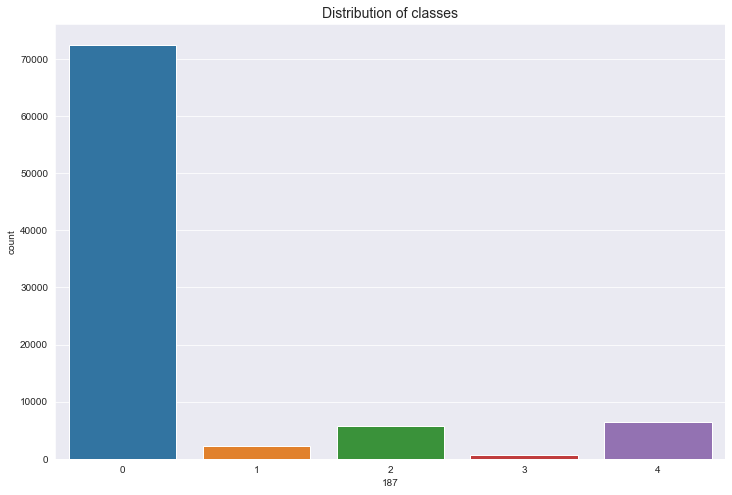

In [18]:
# Visualizing the distribution of classes in the dataset
plt.figure(figsize=(12, 8))
sns.countplot(targetCol)
plt.title("Distribution of classes",fontsize=14)

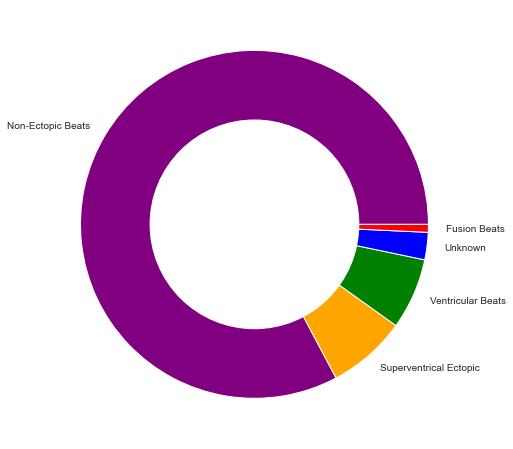

In [21]:
# viewing the distribution of beats in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(dfTrain[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['purple', 'orange', 'green', 
                                                                               'blue', 'red'])
distributionCheck = plt.gcf()
distributionCheck.gca().add_artist(circle)

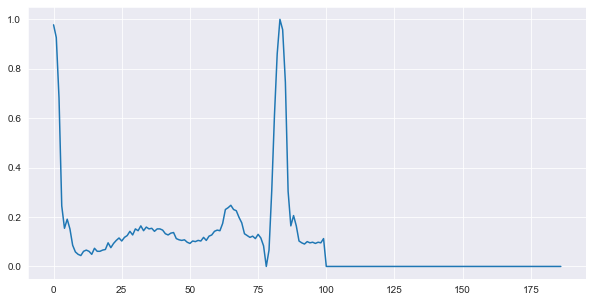

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(dfTrain.iloc[0, 0:187])

# **Data Preprocessing**
In this step, we get data ready for our model. As we already have seperate testing and training dataset, we gonna split our training dataset into 80 percent for training and 20 percent for validation/testing.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dfTrain.iloc[:,:187], 
                                                    dfTrain.iloc[:,-1], test_size=0.2, 
                                                    random_state=1234)
# Now we are going to remove class variable from our test data sample
X_t_mit, y_test_mit = dfTest.iloc[:,:187], dfTest.iloc[:,-1]

In [24]:
print(X_t_mit.shape, " ", y_test_mit.shape , " " , dfTest.shape , " " , dfTest.iloc[:,:187].shape)

(21892, 187)   (21892,)   (21892, 188)   (21892, 187)


In [25]:
# Now in the next step we normalize our testing and training data 
X_train = normalize(X_train, axis=0, norm='max')
X_test = normalize(X_test, axis=0, norm='max')
X_t_mit = normalize(X_t_mit, axis=0, norm='max')

In [26]:
print(X_t_mit.shape)

(21892, 187)


In [27]:
# Reshaping the dataframe into a 3-D Numpy array (batch, Time Period, Value)
X_train_mit = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test_mit = X_test.reshape(len(X_test),X_test.shape[1],1)
test_mit_X = X_t_mit.reshape(len(X_t_mit),X_t_mit.shape[1],1)

# Converting the output into a categorical array for each class
y_train_mit = to_categorical(y_train)
y_valid_mit = to_categorical(y_test)
test_mit_y = to_categorical(y_test_mit)

In [28]:
print("Traing dataset size: ", X_train_mit.shape , " -- OUTPUT: ", y_train_mit.shape)
print("Validation dataset size: ", X_test_mit.shape , " -- OUTPUT: ", y_valid_mit.shape)
print("Test dataset size: ", test_mit_X.shape , " -- OUTPUT: ", test_mit_y.shape)

Traing dataset size:  (70043, 187, 1)  -- OUTPUT:  (70043, 5)
Validation dataset size:  (17511, 187, 1)  -- OUTPUT:  (17511, 5)
Test dataset size:  (21892, 187, 1)  -- OUTPUT:  (21892, 5)


In [29]:
# Calculating the class weights for feeding it to the model
dfTrain.rename(columns={187:"Class"}, inplace=True)
normalmit, superpre, prevent, fusion, unclass = np.bincount(dfTrain.loc[:,'Class'])
total_rec = len(dfTrain)
normmit_weight = (1/normalmit) * (total_rec/5)
superpre_weight = (1/superpre) * (total_rec/5)
prevent_weight = (1/prevent) * (total_rec/5)
fusion_weight =  (1/fusion) * (total_rec/5)
unclass_weight = (1/unclass) * (total_rec/5)
class_weight_mit = {0: normmit_weight, 1: superpre_weight, 2: prevent_weight,
               3: fusion_weight, 4: unclass_weight}

<h1>Convolutional Neural Network</h1>
Now we are going to build 2 models based on neural network. The evaluation metrics are also plotted below in the form of confusion matrix and classification report.

In [30]:
tf.keras.backend.clear_session()

#Function for building Convolutional Neural network
def build_conv1d_model_mit (input_shape=(X_train_mit.shape[1],1)):
    model = keras.models.Sequential()
    
    model.add(Conv1D(filters=32, kernel_size=(7,), padding='same', activation='relu', input_shape=input_shape)) 
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=(7,), padding='same', activation='relu')) 
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
    
    model.add(Conv1D(filters=128, kernel_size=(7,), padding='same', activation='relu')) 
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))

    model.add(Conv1D(filters=256, kernel_size=(7,), padding='same', activation='relu')) 
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
    
    model.add(Conv1D(filters=512, kernel_size=(7,), padding='same', activation='relu')) 
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy', tfa.metrics.F1Score(5,"micro")])
    return model

In [31]:
#Setting early stopping
epochs = 35
checkpoint_model = ModelCheckpoint("model_conv1d_mit.h5", save_best_only=True)
callback = EarlyStopping(monitor='loss', patience=3)
earlystop = EarlyStopping(patience=5, restore_best_weights=True)
#Model Summary
model_conv1d = build_conv1d_model_mit(input_shape=(X_train_mit.shape[1], X_train_mit.shape[2]))
model_conv1d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           256       
                                                                 
 batch_normalization (BatchN  (None, 187, 32)          128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 187, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 38, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 64)            14400     
                                                                 
 batch_normalization_1 (Batc  (None, 38, 64)           2

In [35]:
model_history = model_conv1d.fit(X_train_mit, y_train_mit, epochs=epochs, batch_size=32, 
                             class_weight=class_weight_mit, validation_data=(X_test_mit, y_valid_mit),  
                             callbacks=[checkpoint_model, earlystop])

Epoch 1/35
2189/2189 [==============================] - 156s 70ms/step - loss: 0.8607 - accuracy: 0.5150 - f1_score: 0.5150 - val_loss: 0.6669 - val_accuracy: 0.8749 - val_f1_score: 0.8749
Epoch 2/35
2189/2189 [==============================] - 131s 60ms/step - loss: 0.5621 - accuracy: 0.7616 - f1_score: 0.7616 - val_loss: 0.5083 - val_accuracy: 0.8359 - val_f1_score: 0.8359
Epoch 3/35
2189/2189 [==============================] - 129s 59ms/step - loss: 0.5129 - accuracy: 0.7850 - f1_score: 0.7850 - val_loss: 0.7296 - val_accuracy: 0.7760 - val_f1_score: 0.7760
Epoch 4/35
2189/2189 [==============================] - 131s 60ms/step - loss: 0.4703 - accuracy: 0.8318 - f1_score: 0.8318 - val_loss: 1.0124 - val_accuracy: 0.5947 - val_f1_score: 0.5947
Epoch 5/35
2189/2189 [==============================] - 138s 63ms/step - loss: 0.4584 - accuracy: 0.8502 - f1_score: 0.8502 - val_loss: 2.9081 - val_accuracy: 0.4410 - val_f1_score: 0.4410
Epoch 6/35
2189/2189 [==============================] -

In [36]:
MIT_Results = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}

In [37]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()

Accuracy: 91.34%


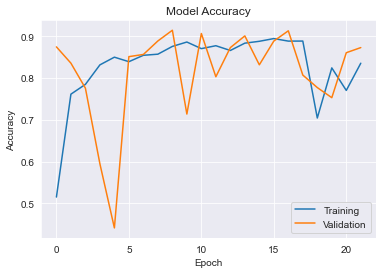

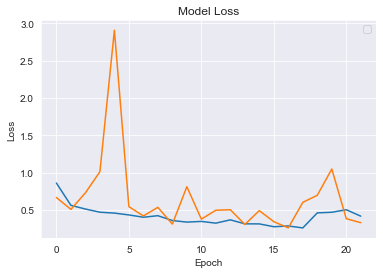

In [38]:
evaluate_model(model_history,X_test_mit, y_valid_mit,model_conv1d)

In [39]:
model_conv1d.load_weights("model_conv1d_mit.h5")
model_conv1d.evaluate(test_mit_X, test_mit_y)
conv1d_prob1 = model_conv1d.predict (test_mit_X)
conv1d_result_pred1 = np.argmax(conv1d_prob1,axis=1)

685/685 [==============================] - 5s 6ms/step


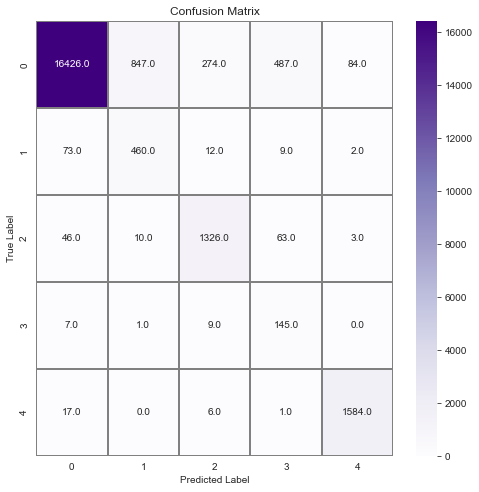

In [46]:
Y_pred_classes = np.argmax(conv1d_prob1,axis = 1) 
Y_true = np.argmax(test_mit_y,axis = 1) 

confusion_mtx = confusion_matrix(Y_true,conv1d_result_pred1) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [49]:
#def confusion_matrix(test_output, conv1d_pred_mit):
print(classification_report(y_test_mit, conv1d_result_pred1, target_names=[MIT_Results[i] for i in MIT_Results]))

                                       precision    recall  f1-score   support

                          Normal Beat       0.99      0.91      0.95     18118
      Supraventricular premature beat       0.35      0.83      0.49       556
    Premature ventricular contraction       0.81      0.92      0.86      1448
Fusion of ventricular and normal beat       0.21      0.90      0.33       162
                  Unclassifiable beat       0.95      0.99      0.97      1608

                             accuracy                           0.91     21892
                            macro avg       0.66      0.91      0.72     21892
                         weighted avg       0.95      0.91      0.93     21892



In [72]:
def model2():
    model2 = keras.models.Sequential()
    model2.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu'
                     , input_shape = (X_train_mit.shape[1],1)))
    model2.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
    model2.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    
    model2.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))
    
    model2.add(Flatten())
    model2.add(Dense(units = 512, activation='relu'))
    model2.add(Dense(units = 1024, activation='relu'))
    model2.add(Dense(units = 5, activation='softmax'))
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model2

In [73]:
#Setting early stopping
checkpoint_model2 = ModelCheckpoint("model2_conv1d_mit.h5", save_best_only=True)
callback2 = EarlyStopping(monitor='loss', patience=3)
earlystop2 = EarlyStopping(patience=5, restore_best_weights=True)
#Model Summary
model2_conv1d = model2()
model2_conv1d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 187, 32)           128       
                                                                 
 conv1d_9 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_10 (Conv1D)          (None, 187, 128)          41088     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 94, 128)          0         
 1D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 94, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 94, 128)          

In [74]:
model_history2 = model2_conv1d.fit(X_train_mit, y_train_mit, epochs=35, batch_size=32, 
                             class_weight=class_weight_mit, validation_data=(X_test_mit, y_valid_mit),  
                             callbacks=[checkpoint_model2, earlystop2])

Epoch 1/35
2189/2189 [==============================] - 252s 115ms/step - loss: 0.6015 - accuracy: 0.7138 - val_loss: 0.3527 - val_accuracy: 0.8984
Epoch 2/35
2189/2189 [==============================] - 250s 114ms/step - loss: 0.4481 - accuracy: 0.8060 - val_loss: 1.4589 - val_accuracy: 0.2916
Epoch 3/35
2189/2189 [==============================] - 274s 125ms/step - loss: 0.4165 - accuracy: 0.8195 - val_loss: 0.2898 - val_accuracy: 0.9091
Epoch 4/35
2189/2189 [==============================] - 283s 129ms/step - loss: 0.3502 - accuracy: 0.8392 - val_loss: 0.1973 - val_accuracy: 0.9321
Epoch 5/35
2189/2189 [==============================] - 284s 130ms/step - loss: 0.3529 - accuracy: 0.8435 - val_loss: 0.4181 - val_accuracy: 0.8348
Epoch 6/35
2189/2189 [==============================] - 295s 135ms/step - loss: 0.2898 - accuracy: 0.8618 - val_loss: 0.6404 - val_accuracy: 0.7369
Epoch 7/35
2189/2189 [==============================] - 286s 131ms/step - loss: 0.3056 - accuracy: 0.8553 - val_

Accuracy: 93.21%


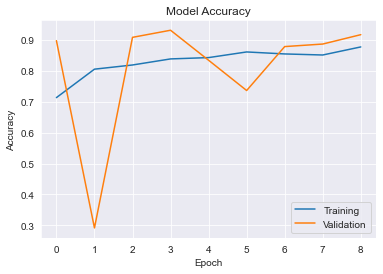

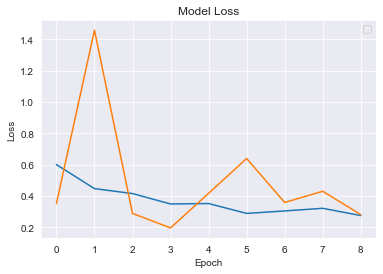

In [75]:
evaluate_model(model_history2,X_test_mit, y_valid_mit,model2_conv1d)

In [76]:
model2_conv1d.load_weights("model2_conv1d_mit.h5")
model2_conv1d.evaluate(test_mit_X, test_mit_y)
conv1d_prob2 = model2_conv1d.predict (test_mit_X)
conv1d_result_pred2 = np.argmax(conv1d_prob2,axis=1)

685/685 [==============================] - 22s 31ms/step


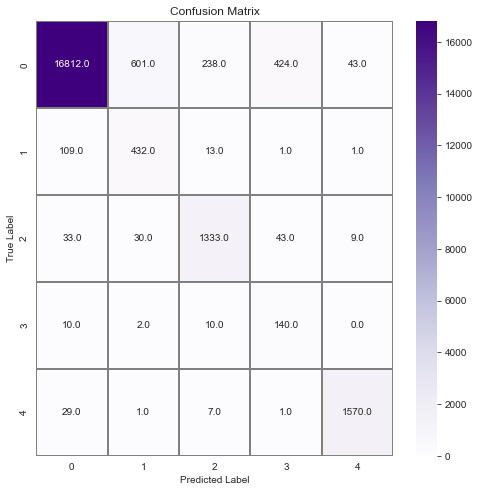

In [77]:
Y_pred_classes = np.argmax(conv1d_prob2,axis = 1) 
Y_true = np.argmax(test_mit_y,axis = 1) 

confusion_mtx = confusion_matrix(Y_true,conv1d_result_pred2) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [78]:
#def confusion_matrix(test_output, conv1d_pred_mit):
print(classification_report(y_test_mit, conv1d_result_pred2, target_names=[MIT_Results[i] for i in MIT_Results]))

                                       precision    recall  f1-score   support

                          Normal Beat       0.99      0.93      0.96     18118
      Supraventricular premature beat       0.41      0.78      0.53       556
    Premature ventricular contraction       0.83      0.92      0.87      1448
Fusion of ventricular and normal beat       0.23      0.86      0.36       162
                  Unclassifiable beat       0.97      0.98      0.97      1608

                             accuracy                           0.93     21892
                            macro avg       0.68      0.89      0.74     21892
                         weighted avg       0.96      0.93      0.94     21892



<h1>Model Fine-Tuning</h1>

In [86]:
tf.keras.backend.clear_session()

#Function for building Convolutional Neural network
def fine_tuned_model (input_shape=(X_train_mit.shape[1],1)):
    model7 = keras.models.Sequential()
    input_sh = tf.keras.layers.Input (shape=(input_shape))
        
    model_1 = Conv1D(64,kernel_size=(7,), padding='same', input_shape=input_shape, activation = 'relu') (input_sh)
    model_1 = BatchNormalization() (model_1)

    model_2 = Conv1D(64,kernel_size=(7,), padding='same') (model_1)
    model_2 = BatchNormalization() (model_2)
    model_2 = tf.keras.layers.ReLU() (model_2)
    
    model_3 = Conv1D(64,kernel_size=(7,), padding='same') (model_2)
    model_3 = BatchNormalization() (model_3)
    model_3 = tf.keras.layers.ReLU() (model_3)

    concat_model = Concatenate()([model_1 , model_3 ])
    max_1 = MaxPool1D(5, padding="same") (concat_model)
    
    model_4 = Conv1D(128,kernel_size=(7,), padding='same') (max_1)
    model_4 = BatchNormalization() (model_4)
    model_4 = tf.keras.layers.ReLU() (model_4)

    model_5 = Conv1D(128,kernel_size=(7,), padding='same', input_shape=input_shape) (model_4)
    model_5 = BatchNormalization() (model_5)
    model_5 = tf.keras.layers.ReLU() (model_5)
    
    model_6 = Conv1D(128,kernel_size=(7,), padding='same', input_shape=input_shape) (model_5)
    model_6 = BatchNormalization() (model_6)
    model_6 = tf.keras.layers.ReLU() (model_6)

    concat_2 = Concatenate()([model_4, model_6])
    max_2 = MaxPool1D(5, padding="same") (concat_2)
    
    model_7 = Conv1D(256,kernel_size=(7,), padding='same') (max_2)
    model_7 = BatchNormalization() (model_7)
    model_7 = tf.keras.layers.ReLU() (model_7)

    model_8 = Conv1D(256,kernel_size=(7,), padding='same') (model_7)
    model_8 = BatchNormalization() (model_8)
    model_8 = tf.keras.layers.ReLU() (model_8)

    model_9 = Conv1D(256,kernel_size=(7,), padding='same') (model_8)
    model_9 = BatchNormalization() (model_9)
    model_9 = tf.keras.layers.ReLU() (model_9)

    concat_3 = Concatenate()([model_7, model_9])
    max_3 = MaxPool1D(5, padding="same") (concat_3)
    
    model_10 = Conv1D(512,kernel_size=(7,), padding='same') (max_3)
    model_10 = BatchNormalization() (model_10)
    model_10 = tf.keras.layers.ReLU() (model_10)

    model_11 = Conv1D(512,kernel_size=(7,), padding='same') (model_10)
    model_11 = BatchNormalization() (model_11)
    model_11 = tf.keras.layers.ReLU() (model_11)

    model_12 = Conv1D(512,kernel_size=(7,), padding='same') (model_11)
    model_12 = BatchNormalization() (model_12)
    model_12 = tf.keras.layers.ReLU() (model_12)

    concat_4 = Concatenate()([model_10, model_12])
    max_4 = MaxPool1D(5, padding="same") (concat_4)

    flat = Flatten() (max_4)
    dense_1 = Dense(1024, activation = 'relu') (flat)
    drop_1 = Dropout(0.5) (dense_1)
    dense_2 = Dense(512, activation='relu') (drop_1)
    drop_2 = Dropout(0.5) (dense_2)
    dense_3 = Dense(256, activation='relu') (drop_2)
    drop_3 = Dropout(0.5) (dense_3)
    dense_4 = Dense(128, activation='relu') (drop_3)
    dense_5 = Dense(64, activation='relu') (dense_4)
    dense_6 = Dense(32, activation='relu') (dense_5)
    dense_7 = Dense(5, activation="softmax") (dense_6)
    
    fn_model = Model (inputs=input_sh, outputs=dense_7)
    
    fn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return fn_model

In [87]:
#Setting early stopping
checkpoint_model7 = ModelCheckpoint("model7_conv1d_mit.h5", save_best_only=True)
callback7 = EarlyStopping(monitor='loss', patience=3)
earlystop7 = EarlyStopping(patience=5, restore_best_weights=True)
#Model Summary
model7_conv1d = fine_tuned_model(input_shape=(X_train_mit.shape[1], X_train_mit.shape[2]))
model7_conv1d.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 187, 64)      512         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 187, 64)     256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv1d_1 (Conv1D)              (None, 187, 64)      28736       ['batch_normalization[0][0]']

In [88]:
model_ft_history = model7_conv1d.fit(X_train_mit, y_train_mit, epochs=35, batch_size=32, 
                             class_weight=class_weight_mit, validation_data=(X_test_mit, y_valid_mit),  
                             callbacks=[checkpoint_model7, earlystop7])

Epoch 1/35
2189/2189 [==============================] - 2077s 946ms/step - loss: 0.9813 - f1_score: 0.4741 - val_loss: 1.0362 - val_f1_score: 0.6022
Epoch 2/35
2189/2189 [==============================] - 1671s 763ms/step - loss: 0.5395 - f1_score: 0.7650 - val_loss: 0.5012 - val_f1_score: 0.8790
Epoch 3/35
2189/2189 [==============================] - 2022s 924ms/step - loss: 0.4505 - f1_score: 0.8545 - val_loss: 0.3587 - val_f1_score: 0.9137
Epoch 4/35
2189/2189 [==============================] - 2466s 1s/step - loss: 0.3706 - f1_score: 0.8684 - val_loss: 0.3899 - val_f1_score: 0.8936
Epoch 5/35
2189/2189 [==============================] - 1688s 771ms/step - loss: 0.3697 - f1_score: 0.8617 - val_loss: 0.2930 - val_f1_score: 0.9081
Epoch 6/35
2189/2189 [==============================] - 1641s 750ms/step - loss: 0.2743 - f1_score: 0.8933 - val_loss: 0.3569 - val_f1_score: 0.8922
Epoch 7/35
2189/2189 [==============================] - 1677s 766ms/step - loss: 0.2507 - f1_score: 0.9089 - 

KeyboardInterrupt: 

In [ ]:
evaluate_model(model_ft_history,X_test_mit, y_valid_mit,model2_conv1d)

In [ ]:
model7_conv1d.load_weights("model7_conv1d_mit.h5")
model7_conv1d.evaluate(test_mit_X, test_mit_y)
conv1d_prob7 = model7_conv1d.predict (test_mit_X)
conv1d_result_pred7 = np.argmax(conv1d_prob7,axis=1)

In [ ]:
print(classification_report(y_test_mit, conv1d_result_pred7, target_names=[MIT_Results[i] for i in MIT_Results]))

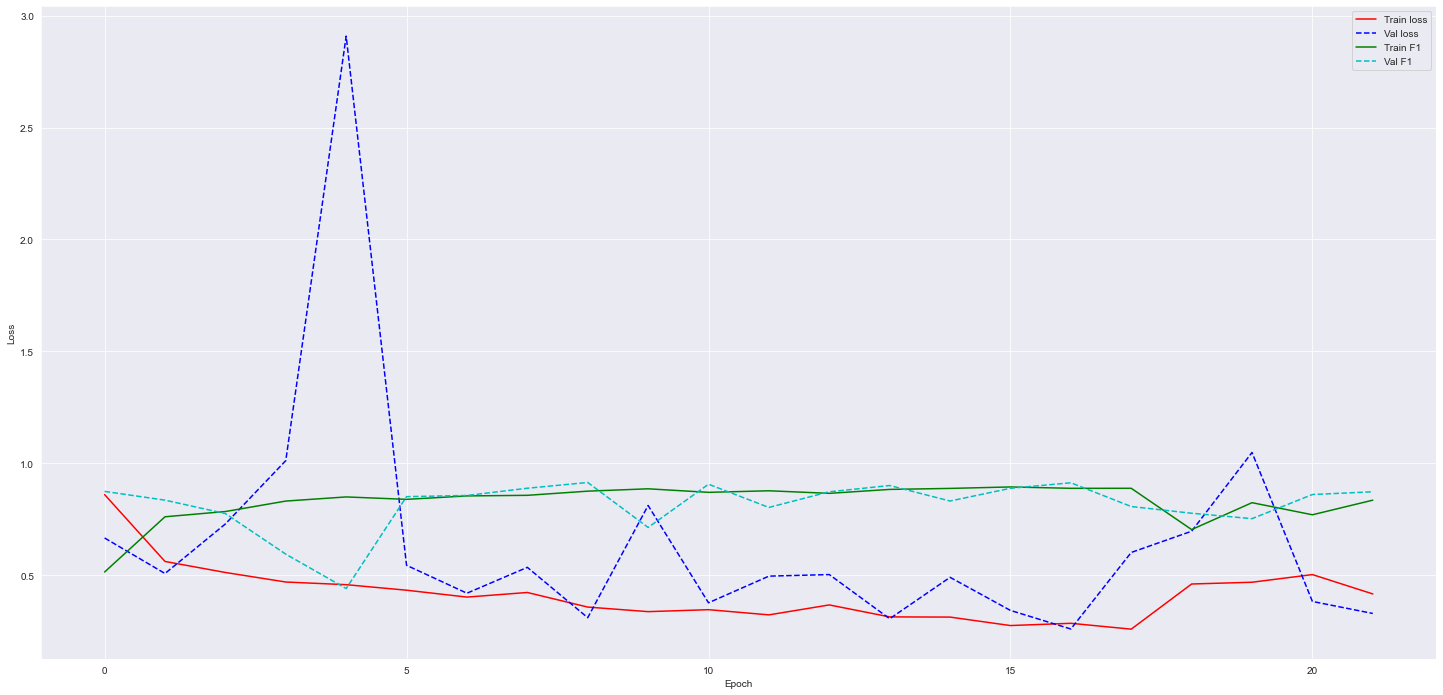

In [90]:
# Plotting the training and validation results
plt.figure(figsize=(25,12))
plt.plot(model_history.epoch, model_history.history['loss'],
           color='r', label='Train loss')
plt.plot(model_history.epoch, model_history.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model_history.epoch, model_history.history['f1_score'],
           color='g', label='Train F1')
plt.plot(model_history.epoch, model_history.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

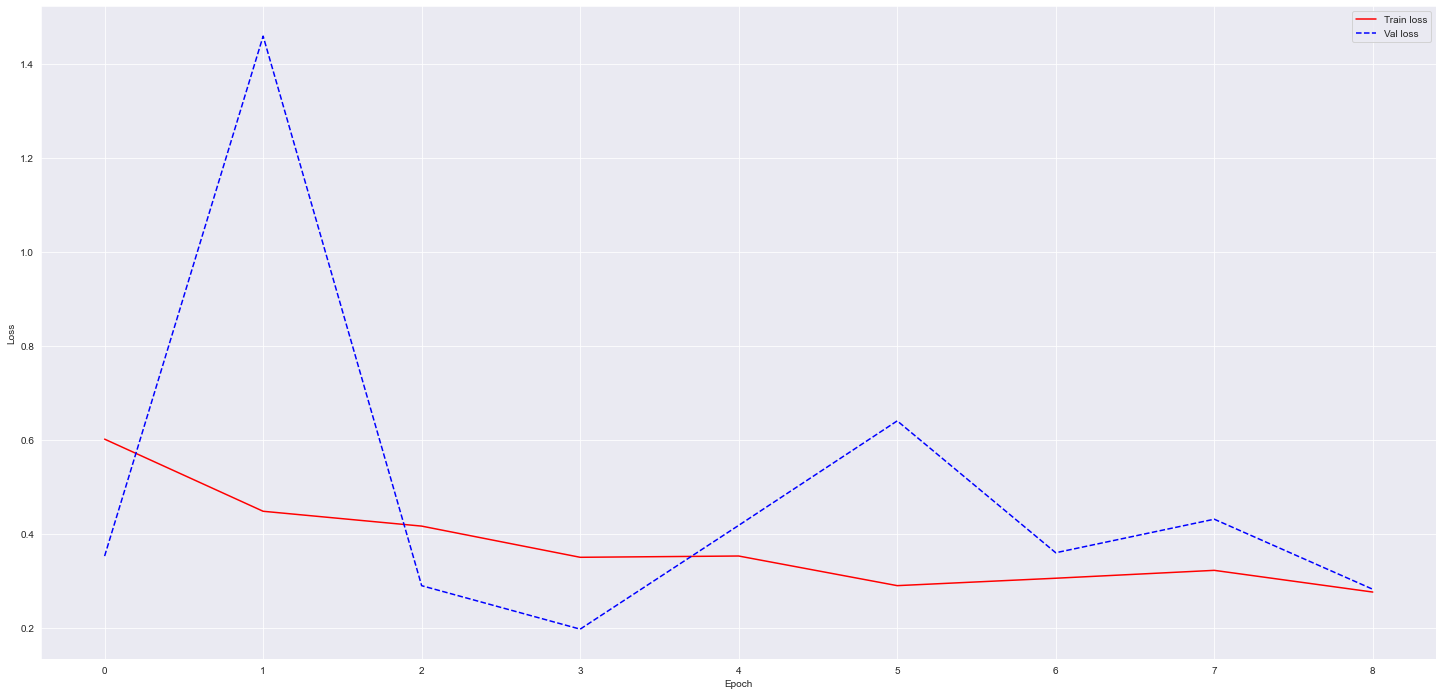

In [92]:
# Plotting the training and validation results
plt.figure(figsize=(25,12))
plt.plot(model_history2.epoch, model_history2.history['loss'],
           color='r', label='Train loss')
plt.plot(model_history2.epoch, model_history2.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()